In [1]:
pip install --upgrade pip 

Note: you may need to restart the kernel to use updated packages.


In [2]:
%matplotlib widget

In [3]:
import matplotlib.pyplot as plt

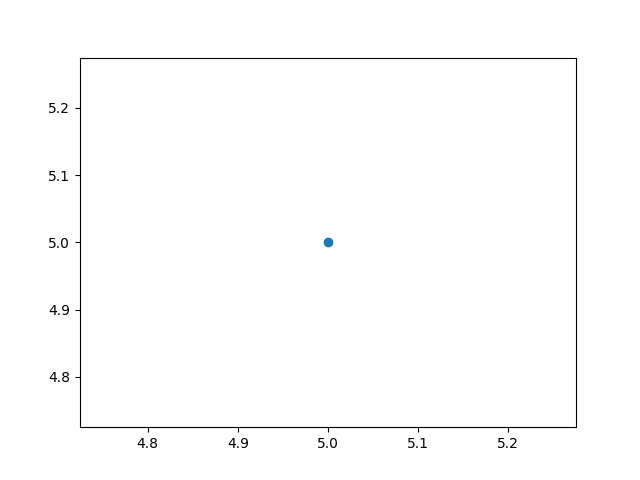

In [4]:
plt.plot(5,5,'o')

In [ ]:
plt.show()

Pandas Basics


In [6]:
!mamba install openpyxl==3.0.9



'mamba' is not recognized as an internal or external command,
operable program or batch file.


Next, we'll do is import two key data analysis modules: pandas and numpy.



In [ ]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd  # primary data structure library


Let's download and import our primary Canadian Immigration dataset using pandas's read_excel() method.

In [ ]:


df_can = pd.read_excel(
    'Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)
print('Data downloaded and read into a dataframe!')


Let's view the top 5 rows of the dataset using the head() function.

In [ ]:
df_can.head(2)
# tip: You can specify the number of rows you'd like to see as follows: df_can.head(10)


We can also view the bottom 5 rows of the dataset using the tail() function.

In [ ]:
df_can.tail()

When analyzing a dataset, it's always a good idea to start by getting basic information about your dataframe. We can do this by using the info() method.

This method can be used to get a short summary of the dataframe.

In [ ]:
df_can.info(verbose=False)


Similarly, to get the list of indices we use the .index instance variables.Similarly, to get the list of indices we use the .index instance variables.

In [ ]:
df_can.index

To get the list of column headers we can call upon the data frame's columns instance variable.

In [ ]:
df_can.columns

Note: The default type of intance variables index and columns are NOT list.

To get the index and columns as lists, we can use the tolist() method.

In [ ]:
df_can.columns.tolist()


In [ ]:
df_can.index.tolist()


To view the dimensions of the dataframe, we use the shape instance variable of it.

In [ ]:
# size of dataframe (rows, columns)
df_can.shape


Note: The main types stored in pandas objects are float, int, bool, datetime64[ns], datetime64[ns, tz], timedelta[ns], category, and object (string). In addition, these dtypes have item sizes, e.g. int64 and int32.

Let's clean the data set to remove a few unnecessary columns. We can use pandas drop() method as follows:

In [ ]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
df_can.head(2)


Let's rename the columns so that they make sense. We can use rename() method by passing in a dictionary of old and new names as follows:

In [ ]:
df_can.rename(columns={'OdName': 'Country',
              'AreaName': 'Continent', 'RegName': 'Region'}, inplace=True)


In [ ]:
df_can.columns


We will also add a 'Total' column that sums up the total immigrants by country over the entire period 1980 - 2013, as follows:

In [ ]:
df_can['Total'] = df_can.sum(axis=1)


In [ ]:
df_can

We can check to see how many null objects we have in the dataset as follows:

In [ ]:
df_can.isnull().sum()


Finally, let's view a quick summary of each column in our dataframe using the describe() method.

In [ ]:
df_can.describe()


pandas Intermediate: Indexing and Selection (slicing)

Select Column
There are two ways to filter on a column name:

Method 1: Quick and easy, but only works if the column name does NOT have spaces or special characters.

    df.column_name               # returns series
Method 2: More robust, and can filter on multiple columns.

    df['column']                  # returns series
    df[['column 1', 'column 2']]  # returns dataframe


Example: Let's try filtering on the list of countries ('Country').

In [ ]:
df_can.Country

Let's try filtering on the list of countries ('Country') and the data for years: 1980 - 1985.

In [ ]:
df_can[['Country', 1980, 1981, 1982, 1983, 1984, 1985]]  # returns a dataframe
# notice that 'Country' is string, and the years are integers.
# for the sake of consistency, we will convert all column names to string later on.


Select Row
There are main 2 ways to select rows:

    df.loc[labels/columns]    # filters by the labels of the index/column
    Exple: df.loc[['japan','china','haiti'],[1980,1988,2004]] #will return a dataframe
    df.iloc[indexs/columns]   # filters by the positions of the index/column

Before we proceed, notice that the default index of the dataset is a numeric range from 0 to 194. This makes it very difficult to do a query by a specific country. For example to search for data on Japan, we need to know the corresponding index value.

This can be fixed very easily by setting the 'Country' column as the index using set_index() method.

In [ ]:
df_can.set_index('Country', inplace=True)
# tip: The opposite of set is reset. So to reset the index, we can use df_can.reset_index()


In [ ]:
df_can.head(3)

In [ ]:
# optional: to remove the name of the index
#df_can.index.name = None


Example: Let's view the number of immigrants from Japan (row 87) for the following scenarios: 1. The full row data (all columns) 2. For year 2013 3. For years 1980 to 1985

In [ ]:
# 1. the full row data (all columns)
df_can.loc['Japan']


In [ ]:
# alternate methods
df_can.iloc[87]


In [ ]:
df_can[df_can.index == 'Japan']#will return a dataframe


In [ ]:
# 2. for year 2013
df_can.loc['Japan', 2013]


In [ ]:
# alternate method
# year 2013 is the last column, with a positional index of 36
df_can.iloc[87, 36]


In [ ]:
# 3. for years 1980 to 1985
df_can.loc['Japan', [1980, 1981, 1982, 1983, 1984, 1984,1985]]


In [ ]:
# Alternative Method
df_can.iloc[87, [3, 4, 5, 6, 7, 8]]


Column names that are integers (such as the years) might introduce some confusion. For example, when we are referencing the year 2013, one might confuse that when the 2013th positional index.

To avoid this ambuigity, let's convert the column names into strings: '1980' to '2013'.

In [ ]:
df_can.columns = list(map(str, df_can.columns))


In [ ]:
[print (type(x)) for x in df_can.columns] #<-- uncomment to check type of column headers


Since we converted the years to string, let's declare a variable that will allow us to easily call upon the full range of years:

In [ ]:
# useful for plotting later on
years = list(map(str, range(1980, 2014)))
years


Filtering based on a criteria
To filter the dataframe based on a condition, we simply pass the condition as a boolean vector.

For example, Let's filter the dataframe to show the data on Asian countries (AreaName = Asia).

In [ ]:
# 1. create the condition boolean series
condition = df_can['Continent'] == 'Asia'
print(condition)


In [ ]:
# 2. pass this condition into the dataFrame
df_can[condition]


In [ ]:
# we can pass multiple criteria in the same line.
# let's filter for AreaNAme = Asia and RegName = Southern Asia

df_can[(df_can['Continent'] == 'Asia') & (df_can['Region'] == 'Southern Asia')]

# note: When using 'and' and 'or' operators, pandas requires we use '&' and '|' instead of 'and' and 'or'
# don't forget to enclose the two conditions in parentheses


Before we proceed: let's review the changes we have made to our dataframe

In [ ]:
print('data dimensions:', df_can.shape)
print(df_can.columns)
df_can.head(2)


Visualizing Data using Matplotlib

Matplotlib: Standard Python Visualization Library

The primary plotting library we will explore in the course is Matplotlib. As mentioned on their website:

Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shell, the jupyter notebook, web application servers, and four graphical user interface toolkits.

If you are aspiring to create impactful visualization with python, Matplotlib is an essential tool to have at your disposal.

Matplotlib.Pyplot

One of the core aspects of Matplotlib is matplotlib.pyplot. It is Matplotlib's scripting layer which we studied in details in the videos about Matplotlib. Recall that it is a collection of command style functions that make Matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc. In this lab, we will work with the scripting layer to learn how to generate line plots. In future labs, we will get to work with the Artist layer as well to experiment first hand how it differs from the scripting layer.

Let's start by importing matplotlib and matplotlib.pyplot as follows:

In [ ]:
# we are using the inline backend
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib widget


In [ ]:
print(plt.style.available)


Plotting in pandas

Fortunately, pandas has a built-in implementation of Matplotlib that we can use. Plotting in pandas is as simple as appending a .plot() method to a series or dataframe.

Line Pots (Series/Dataframe) 

What is a line plot and why use it?

A line chart or line plot is a type of plot which displays information as a series of data points called 'markers' connected by straight line segments. It is a basic type of chart common in many fields. Use line plot when you have a continuous data set. These are best suited for trend-based visualizations of data over a period of time.

Let's start with a case study:

In 2010, Haiti suffered a catastrophic magnitude 7.0 earthquake. The quake caused widespread devastation and loss of life and aout three million people were affected by this natural disaster. As part of Canada's humanitarian effort, the Government of Canada stepped up its effort in accepting refugees from Haiti. We can quickly visualize this effort using a Line plot:

Question: Plot a line graph of immigration from Haiti using df.plot().

First, we will extract the data series for Haiti.

In [ ]:
# passing in years 1980 - 2013 to exclude the 'total' column
haiti = df_can.loc['Haiti', years]#will return a data series
haiti.head()


In [ ]:
df_can[df_can.index=='Haiti']

Next, we will plot a line plot by appending .plot() to the haiti dataframe.

In [ ]:
haiti.plot()

pandas automatically populated the x-axis with the index values (years), and the y-axis with the column values (population). However, notice how the years were not displayed because they are of type string. Therefore, let's change the type of the index values to integer for plotting.

In [ ]:
# let's change the index values of Haiti to type integer for plotting
haiti.index = haiti.index.map(int)


In [ ]:
plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')


In [ ]:
plt.show()

We can clearly notice how number of immigrants from Haiti spiked up from 2010 as Canada stepped up its efforts to accept refugees from Haiti. Let's annotate this spike in the plot by using the plt.text() method.

Quick note on x and y values in plt.text(x, y, label):

 Since the x-axis (years) is type 'integer', we specified x as a year. The y axis (number of immigrants) is type 'integer', so we can just specify the value y = 6000.
    plt.text(2000, 6000, '2010 Earthquake') # years stored as type int
If the years were stored as type 'string', we would need to specify x as the index position of the year. Eg 20th index is year 2000 since it is the 20th year with a base year of 1980.
    plt.text(20, 6000, '2010 Earthquake') # years stored as type int
We will cover advanced annotation methods in later modules.

In [ ]:
# annotate the 2010 Earthquake.
# syntax: plt.text(x, y, label)
plt.text(30, 6000, '2010 Earthquake')  # see note above


In [ ]:

plt.show()


Question: Let's compare the number of immigrants from India and China from 1980 to 2013.

Step 1: Get the data set for China and India, and display the dataframe.

In [ ]:
china=df_can[df_can.index == 'China']
china

In [ ]:
india=df_can[df_can.index == 'India']
india

In [ ]:
china_india = df_can.loc[['China','India'], years]
china_india


Step 2: Plot graph. We will explicitly specify line plot by passing in kind parameter to plot().

In [ ]:
china_india.plot()

That doesn't look right...

Recall that pandas plots the indices on the x-axis and the columns as individual lines on the y-axis. Since df_CI is a dataframe with the country as the index and years as the columns, we must first transpose the dataframe using transpose() method to swap the row and columns.
When using plot() on a dataframe, it's better to transpose before plotting

In [ ]:
china_india=china_india[years].transpose()

In [ ]:
china_india.head()

In [ ]:
china_india.plot()

In [ ]:
plt.title('Immigration from china and india')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')


In [ ]:
plt.show()

Line plot is a handy tool to display several dependent variables against one independent variable. However, it is recommended that no more than 5-10 lines on a single graph; any more than that and it becomes difficult to interpret.

Question: Compare the trend of top 5 countries that contributed the most to immigration to Canada.

In [ ]:
#The correct answer is:
#Step 1: Get the dataset. Recall that we created a Total column that calculates cumulative immigration by country.
#We will sort on this column to get our top 5 countries using pandas sort_values() method.


In [ ]:
df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)


In [ ]:
df_top5=df_can.head()

In [ ]:
df_top5=df_top5.transpose()

In [ ]:
df_top5=df_top5[years].transpose()
df_top5


In [ ]:
df_top5.plot()

Other Plots
Congratulations! you have learned how to wrangle data with python and create a line plot with Matplotlib. There are many other plotting styles available other than the default Line plot, all of which can be accessed by passing kind keyword to plot(). The full list of available plots are as follows:

bar for vertical bar plots

barh for horizontal bar plots

hist for histogram

box for boxplot

kde or density for density plots

area for area plots

pie for pie plots

scatter for scatter plots

hexbin for hexbin plot